# **Bike Sharing Assignment - Demand Prediction (Linear Regression)**
##### **`Naseem I Kesingwala (Dec'24)`**

### **Problem Overview:**

BoomBikes, a popular bike-sharing service in the United States, has seen a significant decline in demand due to the COVID-19 pandemic. As quarantine restrictions ease and cities return to normal, the company must predict future bike demand to adjust its strategy. This will allow BoomBikes to regain market position and allocate resources effectively as bike-sharing demand rises post-pandemic.

Understanding the factors driving bike demand is critical, as the pandemic has altered consumer behaviors. BoomBikes aims to model key variables affecting demand, such as weather, seasonality, holidays, and more, to prepare for an expected surge in customers.

### **Key Questions:**
- **What are the key factors influencing bike-sharing demand?**
  - This includes factors like weather, seasonality, holidays, and weekdays vs weekends.

- **How accurately can these factors predict future demand?**
  - A predictive model will help BoomBikes make informed decisions about fleet size, pricing, marketing, and customer engagement.

### **Objective:**
- Build a **multiple linear regression model** to identify key predictors of bike-sharing demand.
- Use the model’s insights to help BoomBikes adjust strategies, including resource allocation, promotional offers, and operational planning.
- Ensure the model provides clear, actionable insights for boosting demand during peak periods (e.g., Spring, September) while minimizing downtime during adverse weather (e.g., light rain and snow).

By leveraging historical data, BoomBikes can prepare for the future, regaining market share and optimizing bike-sharing services in a post-pandemic world.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Suppressing warnings
warnings.filterwarnings('ignore')

## Step 2: Loading the Dataset and Exploring the Data

In this step, we'll load the dataset and perform an initial exploration to understand its structure, including the number of rows, columns, and types of variables. This helps us prepare for further data cleaning and analysis.

In [2]:
# Loading the dataset using pandas
df_bike_data = pd.read_csv('day.csv')

In [3]:
# Displaying the first few rows of the dataset
df_bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Checking the shape of the dataset
df_bike_data.shape

(730, 16)

In [5]:
# Checking for null values and data types
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Summary statistics of numerical columns
df_bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Checking the columns of the dataset
df_bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Checking the size of the dataset (total number of elements)
df_bike_data.size

11680

In [9]:
# Checking the data types of each column
df_bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Checking the axes of the dataset
df_bike_data.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
# Checking the dimensions of the dataset
df_bike_data.ndim

2

In [12]:
# Checking the values of the dataset
df_bike_data.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

### Data Overview:
- The dataset consists of 730 rows and 16 columns.
- There are no missing values in any of the columns, ensuring data completeness.

## Step 3: Data Cleaning

In this step, we will clean the dataset to ensure it's ready for analysis. This involves handling any inconsistencies, formatting issues, or unnecessary columns. Data cleaning is essential for ensuring that our model performs accurately and efficiently.

### 3.1 Dropping Unnecessary Columns

In this step, we remove columns that do not contribute to the analysis.
- The `instant` column serves as a row identifier and does not provide meaningful information for the analysis.
- The `dteday` column is removed because we already have date-related features like `mnth`, `year`, and `weekday`, and we are not considering daily trends in bike demand for this analysis.
- The `casual` and `registered` columns are removed as they are unavailable during prediction. Additionally, they are directly related to the target variable `cnt` (i.e., `cnt = casual + registered`), which could lead to data leakage.

In [13]:
# Creating a new column 'days_old' to represent the age of the business in days
df_bike_data['days_old'] = (pd.to_datetime(df_bike_data['dteday'], format='%d-%m-%Y') - pd.to_datetime('01-01-2018', format='%d-%m-%Y')).dt.days

In [14]:
# Inspecting the updated dataset
df_bike_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [15]:
# Dropping 'instant' column as it is just an index with no relevance to the analysis
df_bike_data.drop(['instant'], axis=1, inplace=True)

In [16]:
# Dropping 'dteday' column as we already have month and weekday features
df_bike_data.drop(['dteday'], axis=1, inplace=True)

#### Dropping `casual` and `registered` columns as they are directly related to the target `cnt` (i.e., `cnt = casual + registered`).

In [17]:
# Dropping 'casual' and 'registered' columns
df_bike_data.drop(['casual'], axis=1, inplace=True)
df_bike_data.drop(['registered'], axis=1, inplace=True)

In [18]:
# Inspecting the dataset after dropping the columns
df_bike_data.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [19]:
# Checking the dataset info (data types, non-null counts)
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [20]:
# Checking the value counts for 'season' and 'weathersit' columns
df_bike_data.season.value_counts()
df_bike_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
# Checking correlation between numerical variables
df_bike_data.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.000023   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.004619   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.067534 -0.000023  
workingday  0.062542 -0.004619  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

We observe that features like `season`, `mnth`, `weekday`, and `weathersit` are represented as integers, although they should be treated as categorical variables.

### 3.2 Handling Missing Values

In this step, we will check for any missing values in the dataset and decide on the appropriate strategy to handle them, such as imputation or removal, to ensure the dataset is ready for modeling.

#### Although we have already observed that there are no missing values, let's verify it once again.

In [22]:
# Checking for missing values in each column
df_bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _Inference_: There are no null values in the dataset.

### 3.3 Handling Outliers

In this step, we will identify and handle outliers in the dataset. Outliers can distort the model's performance, so we will either remove or transform them to ensure the data is suitable for analysis.

In [23]:
# Checking the columns of the dataset
df_bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [24]:
# Printing the number of unique values in each column
df_bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

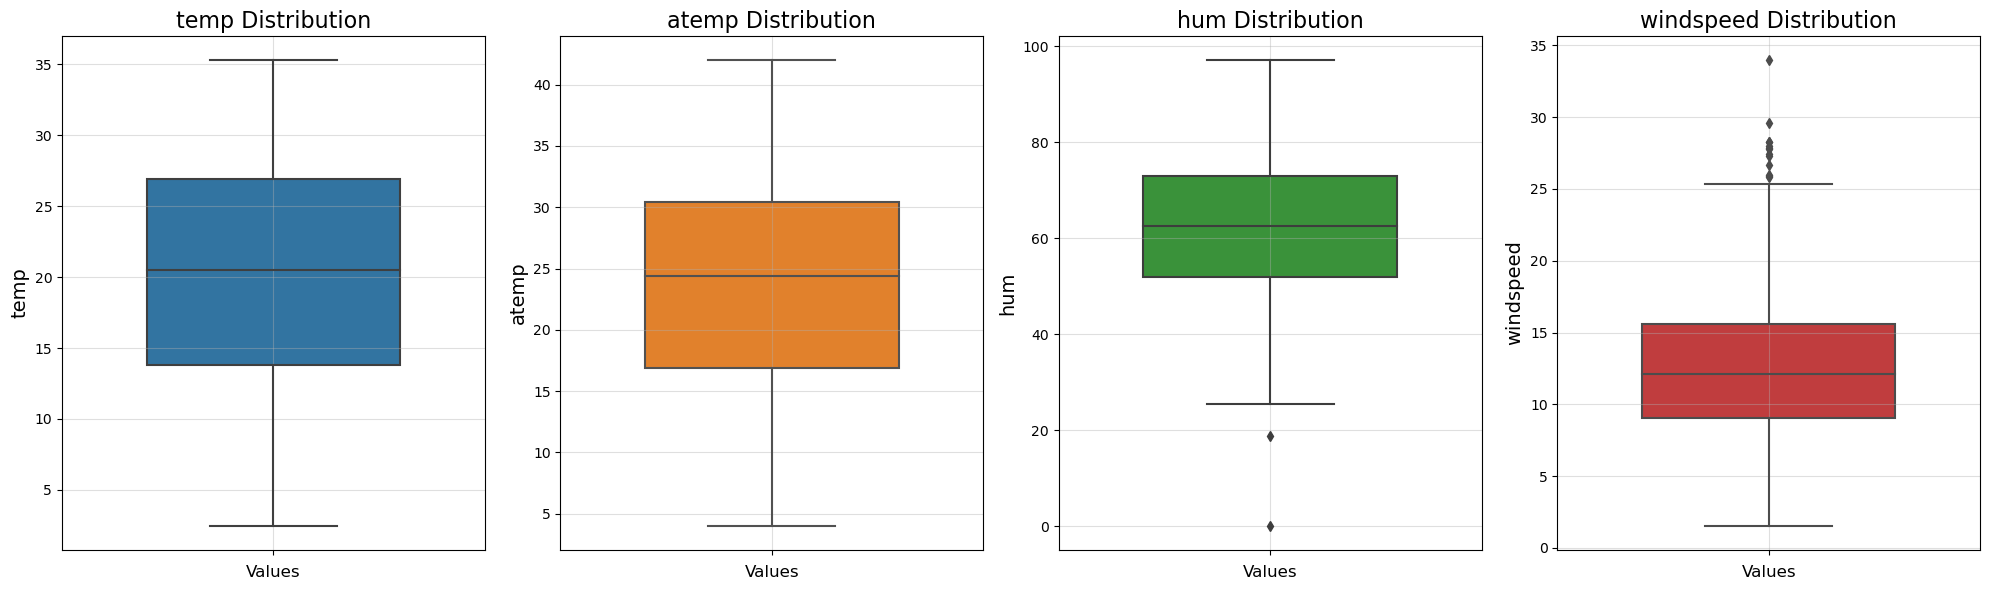

In [25]:
# Drawing box plots
plt.figure(figsize=(20,6))

# Using color palette
cols = ['temp', 'atemp', 'hum', 'windspeed']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Using custom colors

for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=col, data=df_bike_data, palette=[colors[i-1]], width=0.6)
    plt.title(f'{col} Distribution', fontsize=16, fontweight='normal')
    plt.ylabel(f'{col}', fontsize=14, fontweight='normal')
    plt.xlabel('Values', fontsize=12)
    plt.grid(True, linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

#### From these plots, we can see that there are no outliers to be handled. We are good with not having any outliers in the dataset.

# 4. Exploratory Data Analysis (EDA)

In this step, we will conduct an exploratory data analysis to better understand the dataset, identify patterns, and visualize the relationships between the features and the target variable `cnt`. This will help us gain insights for the model-building process.

#### 4.1 Convert `season` and `weathersit` to categorical types

Since `season` and `weathersit` are categorical variables, we will convert them to the appropriate categorical data type for better analysis and performance in the modeling process.

In [26]:
# Converting 'season' and 'weathersit' to categorical values
df_bike_data.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)
df_bike_data.weathersit.replace({1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'}, inplace=True)

# Converting 'mnth' and 'weekday' to readable formats
df_bike_data.mnth = df_bike_data.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                                                                 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

df_bike_data.weekday = df_bike_data.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

In [27]:
# Displaying the first few rows of the dataset after converting categorical variables to more readable formats
df_bike_data.head()  # This shows the changes in 'season', 'weathersit', 'mnth', and 'weekday' columns

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

#### 4.2 Draw Pair Plots to Check the Linear Relationship

We will use pair plots to visualize the relationships between different features and check if there are any linear relationships that could be useful in building the prediction model.

<Figure size 1500x1000 with 0 Axes>

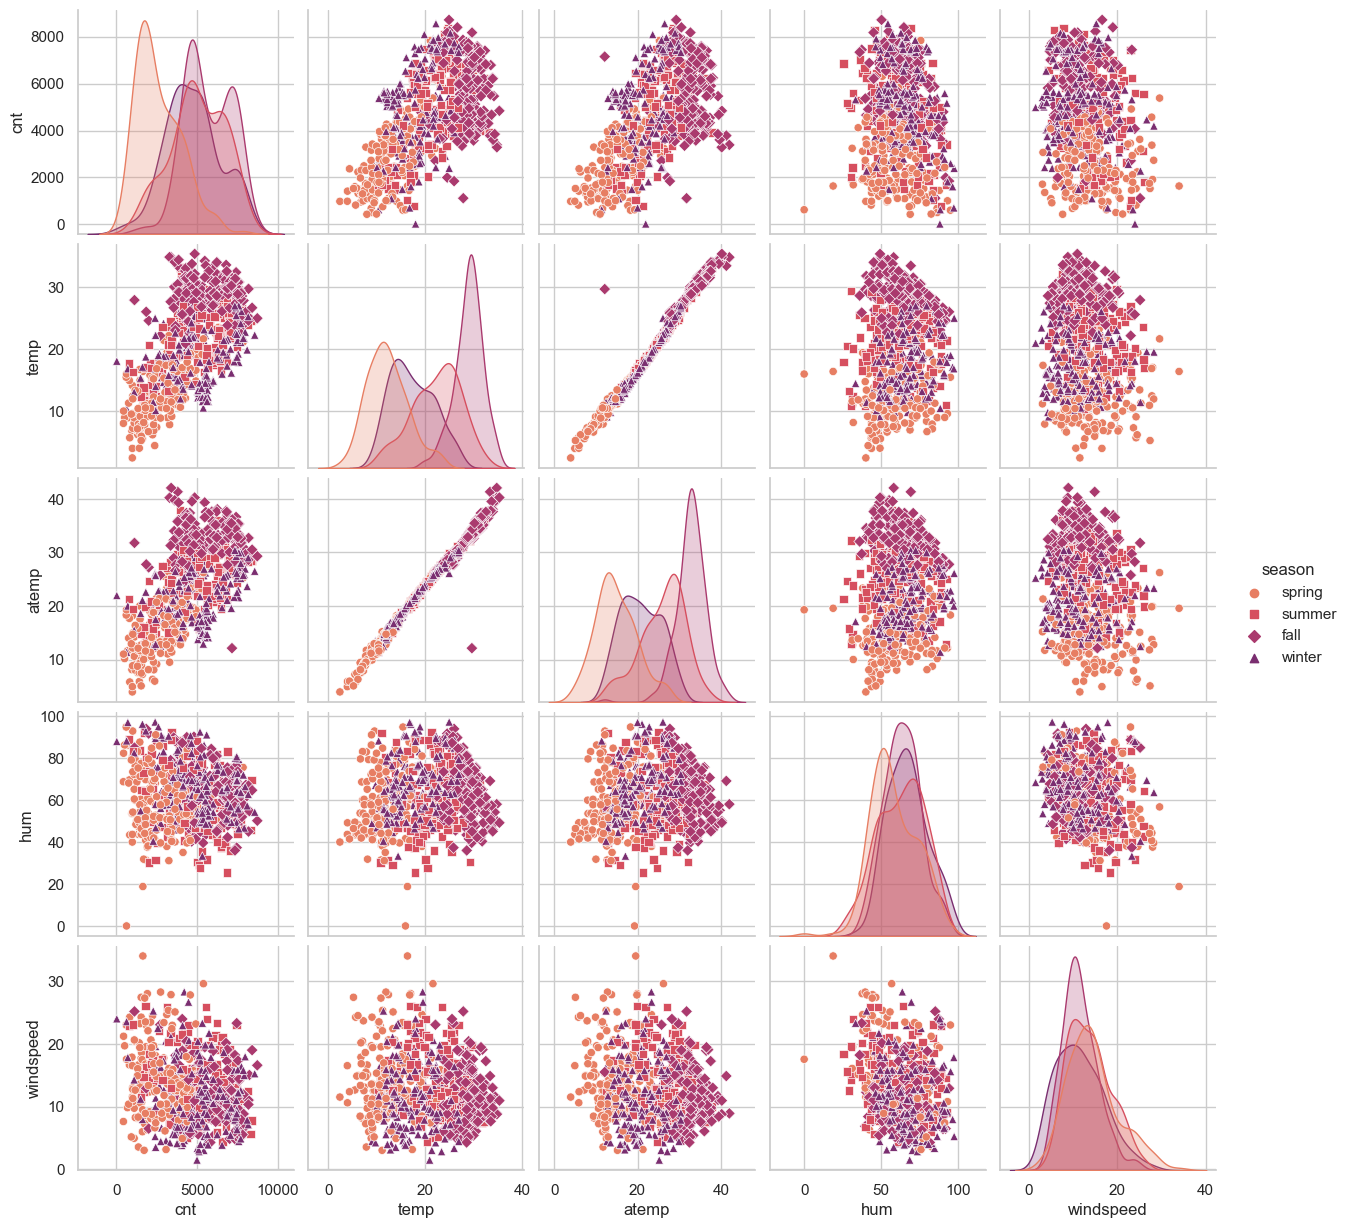

In [28]:
# Drawing pair plots
plt.figure(figsize=(15, 10))  # Adjusting figure size for better visibility

# Setting the style to whitegrid for clarity
sns.set(style="whitegrid")

# Creating pair plots for continuous numeric variables
sns.pairplot(data=df_bike_data, 
             vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'], 
             hue="season", palette="flare", 
             markers=["o", "s", "D", "^"], height=2.5)

# Displaying the plot
plt.show()

#### _`Inference`_: 
- It appears that the temperature (`temp`) and apparent temperature (`atemp`) have the highest correlation with the target variable `cnt`.
- `temp` and `atemp` are highly correlated with each other, which is expected since `atemp` is a modified version of `temp`.
#### From the correlation map, we observe that the output variable `cnt` has a strong linear relationship with variables like `temp` and `atemp`.

#### 4.3 Visualizing the Data to Find the Correlation between Numerical Variables

In this section, we will use a heatmap to visualize the correlation matrix of the numerical variables in the dataset. This will help in identifying the relationships between different variables and their impact on the target variable `cnt`.

<Figure size 2000x1500 with 0 Axes>

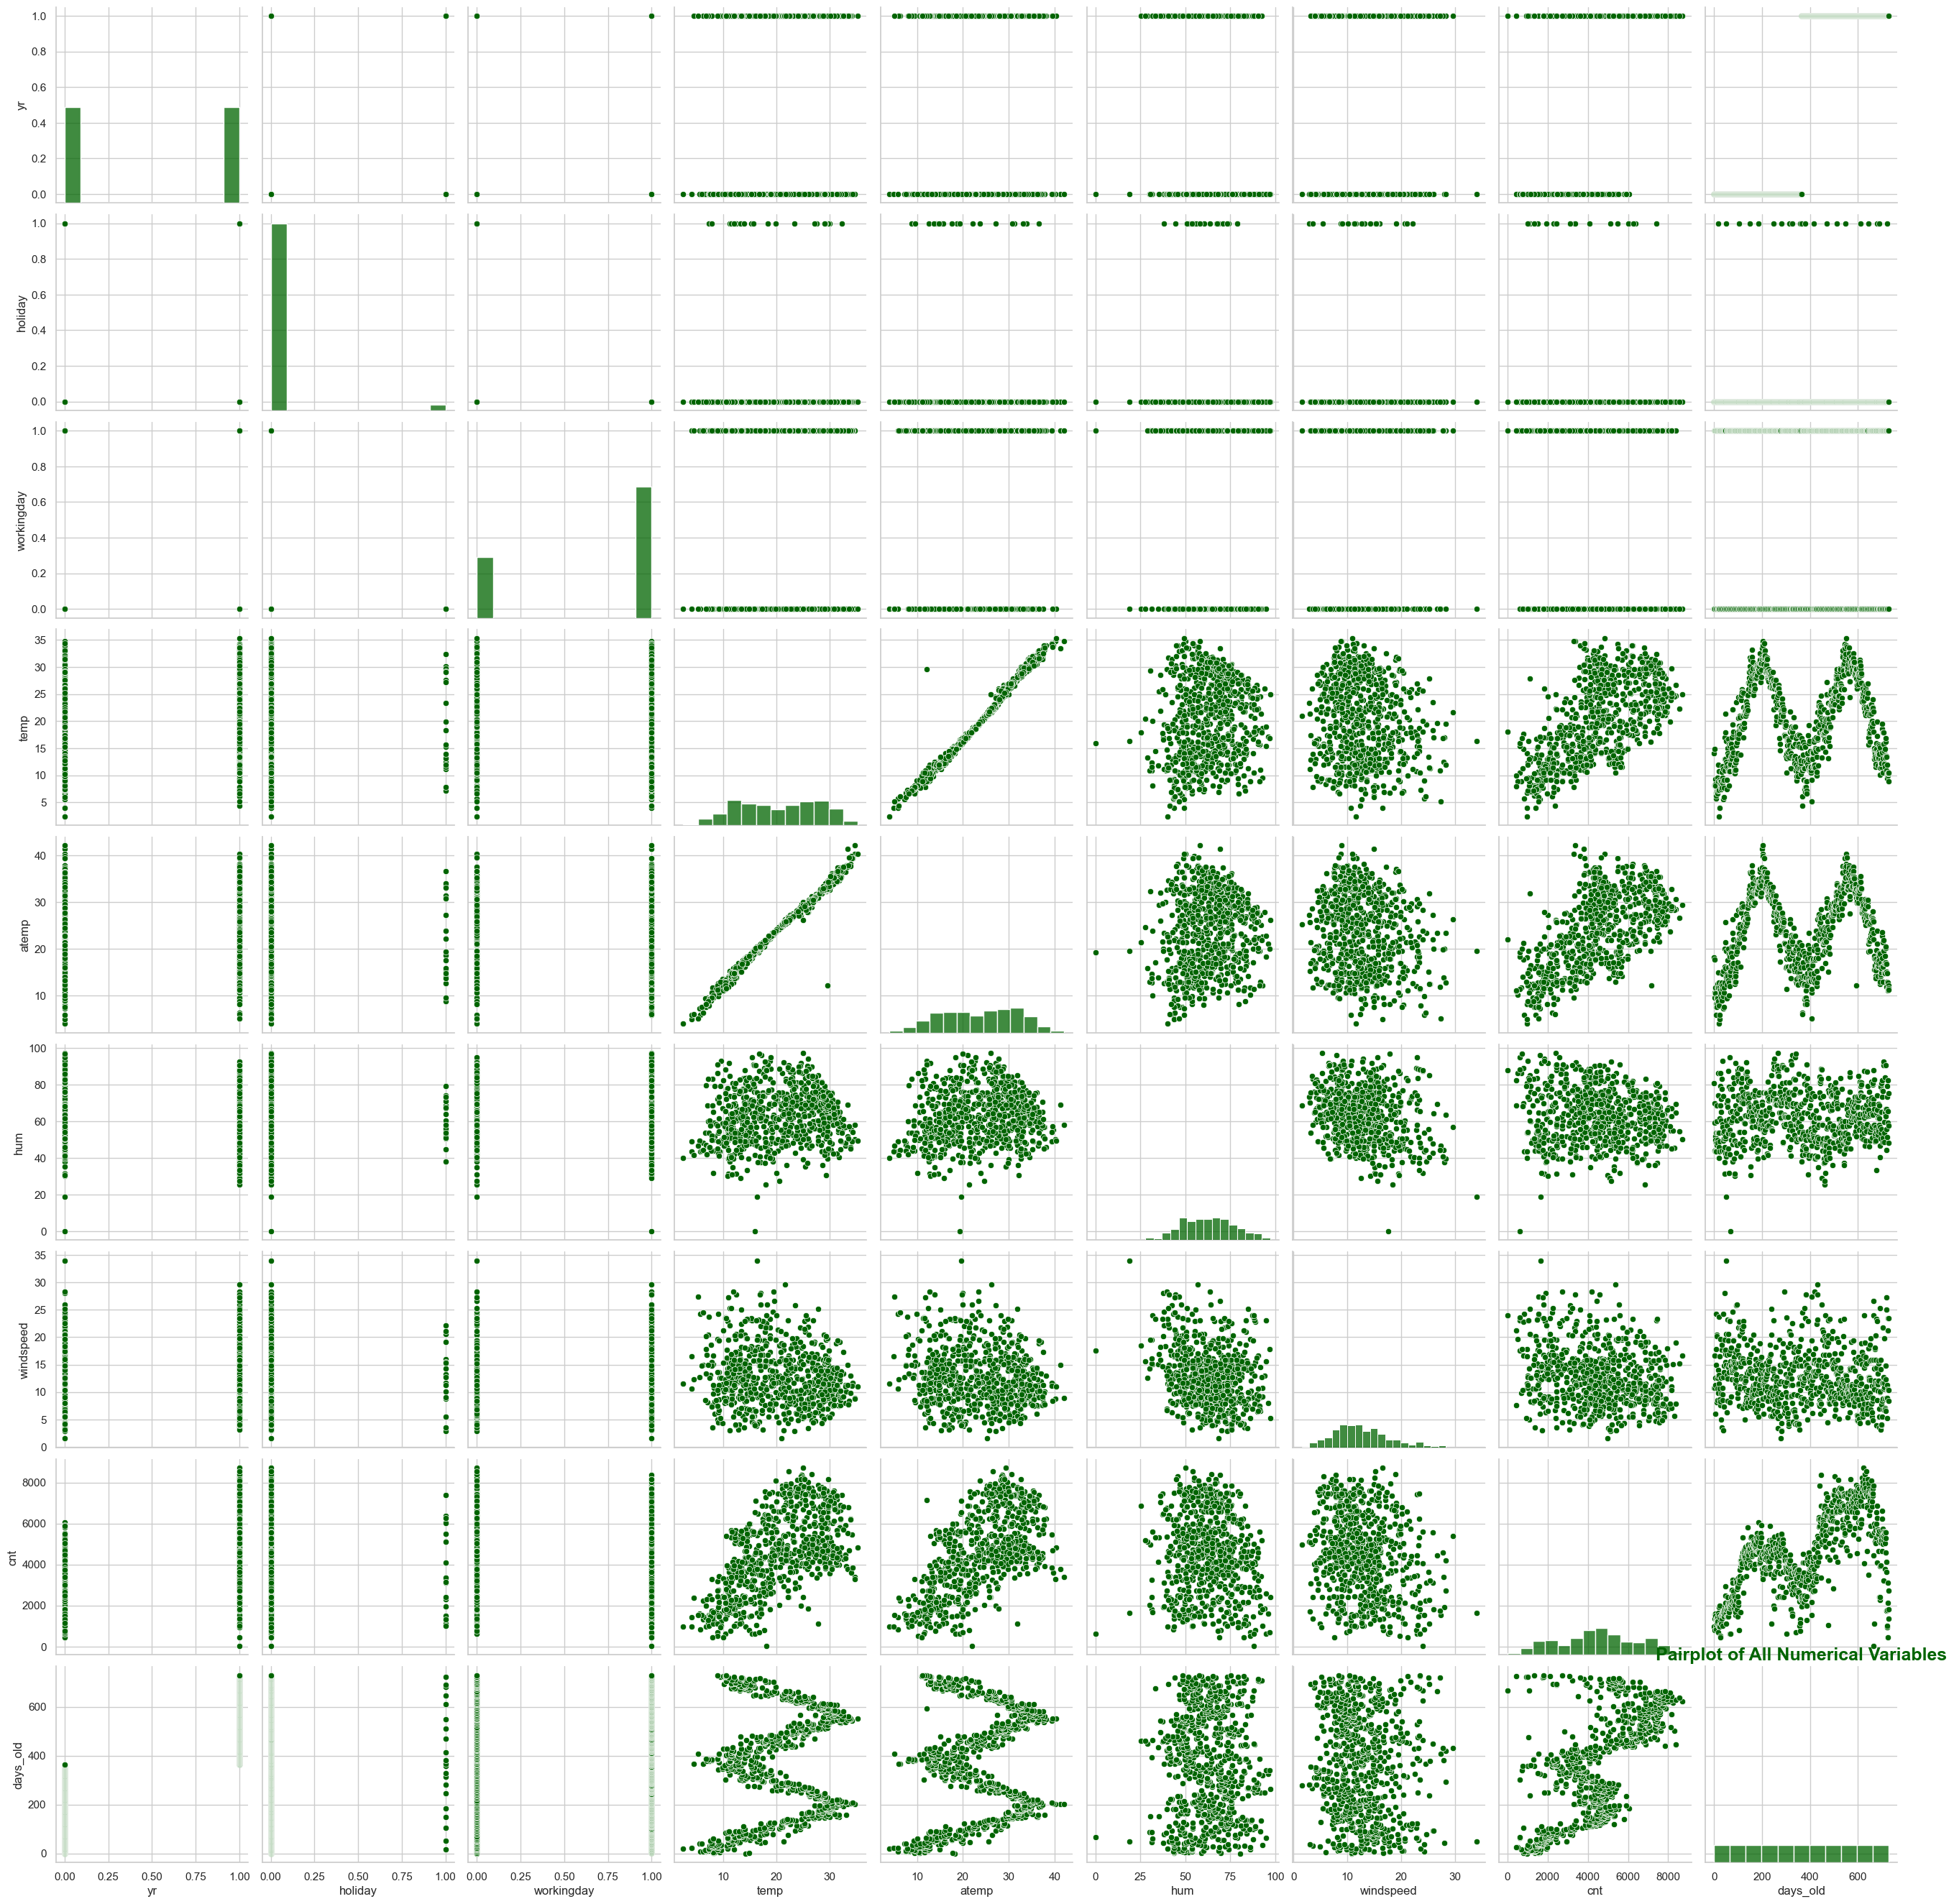

In [29]:
# Drawing a pairplot with dark green color for all plots
plt.figure(figsize=(20, 15))

# Use a dark green color for all variables
sns.pairplot(df_bike_data, 
             plot_kws={'color': 'darkgreen'},
             diag_kws={'color': 'darkgreen'},
             markers='o', height=3)

# Add a bold title with dark green for better visibility
plt.title("Pairplot of All Numerical Variables", fontsize=18, fontweight='bold', color='darkgreen')

# Show the plot
plt.show()

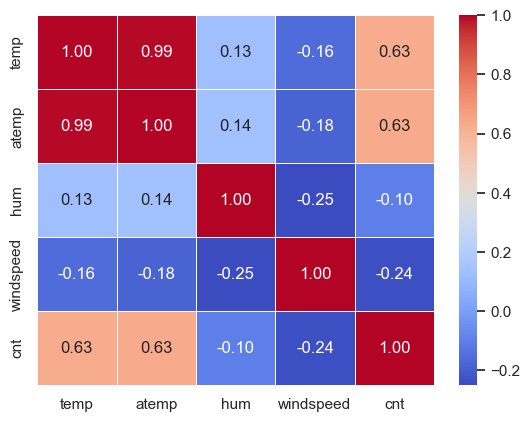

In [30]:
# Heatmap to visualize correlation between key continuous variables
sns.heatmap(df_bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

#### _`Inference`_:
- The correlation between `temp` and `atemp` is above 0.99, which indicates that both variables are highly correlated. Since `atemp` seems to be derived from `temp`, we can drop the `atemp` column to avoid redundancy.

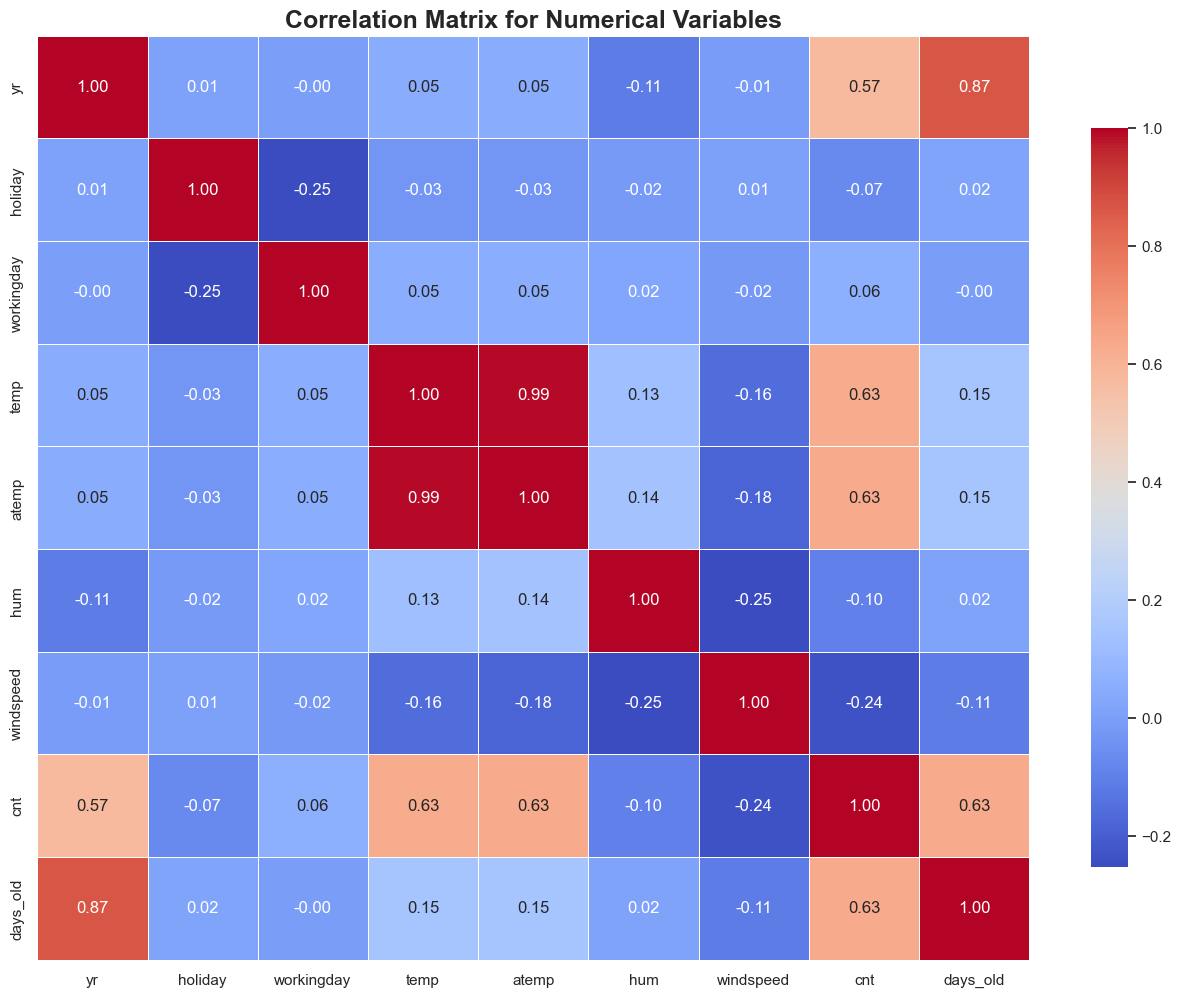

In [31]:
# Correlations for numeric variables with updated heatmap style and color
cor = df_bike_data.corr()

# Drawing heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add title to the heatmap
plt.title('Correlation Matrix for Numerical Variables', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

#### _`4.4 Draw Heatmap of Correlation between Variables`_:
- The heatmap below visualizes the correlation matrix for the numerical variables in the dataset, helping us identify relationships between them.

In [32]:
# Calculate Correlation
corr = df_bike_data.corr()

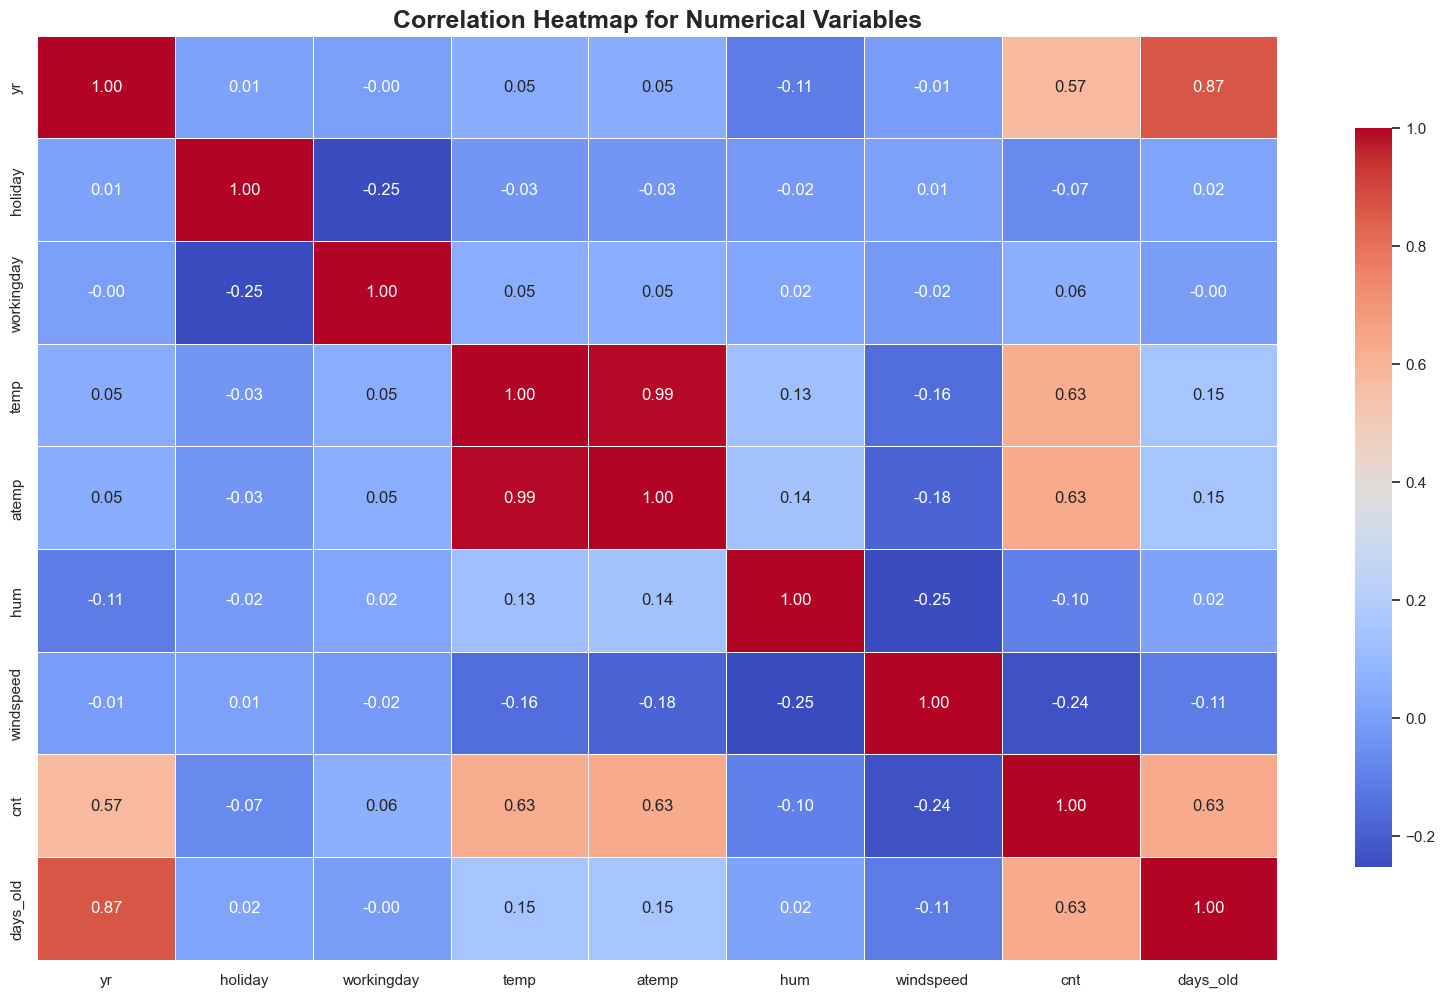

In [33]:
# Draw a heatmap of correlation
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Adding title
plt.title('Correlation Heatmap for Numerical Variables', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

#### _`Inference`_:
- From the correlation map, `temp`, `atemp`, and `days_old` appear to be highly correlated. We will consider only one of these variables for the model and eliminate the others based on the Variance Inflation Factor (VIF) during model building.
- We also observe that the target variable (`cnt`) has a linear relationship with some of the independent variables, which is a good sign for building a linear regression model.

#### _`4.5 Analyzing Categorical Variables with Target Variable`_:
- In this section, we will explore the relationship between categorical variables and the target variable `cnt` to gain insights into their impact on bike rentals.

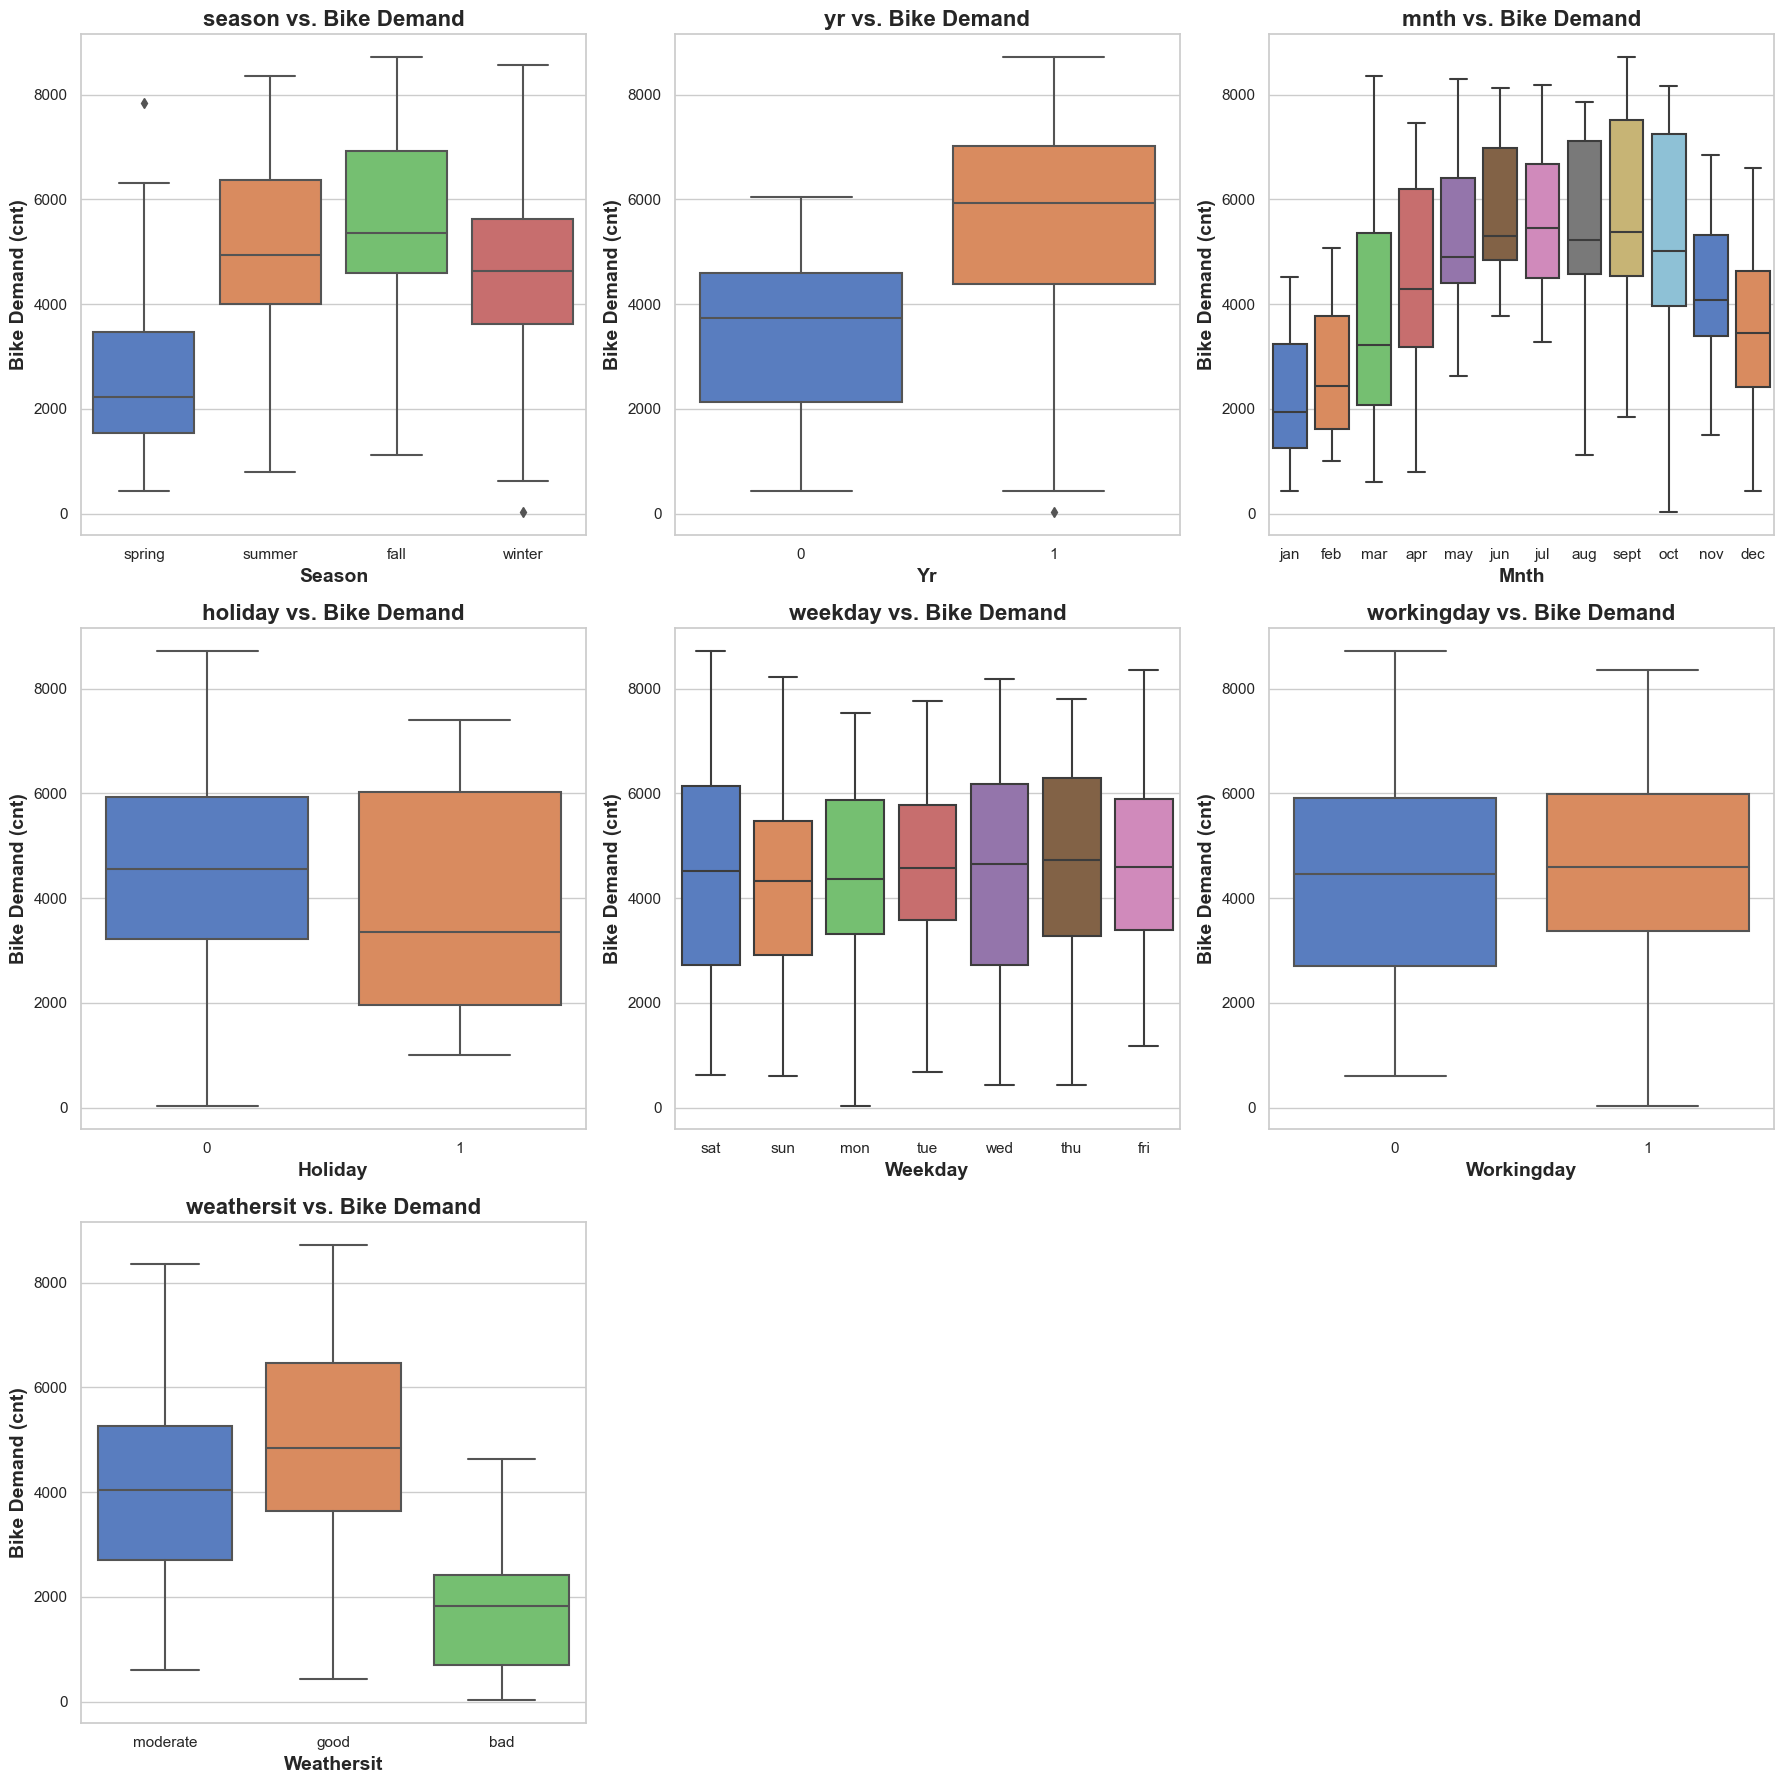

In [34]:
# Boxplot for categorical variables to see demands
vars_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(18, 18))

# Iterate through each categorical variable and plot the boxplot for 'cnt'
for i, var in enumerate(vars_cat):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_bike_data, x=var, y='cnt', palette='muted')
    plt.title(f'{var} vs. Bike Demand', fontsize=16, fontweight='bold')
    plt.xlabel(var.capitalize(), fontsize=14, fontweight='bold')
    plt.ylabel('Bike Demand (cnt)', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

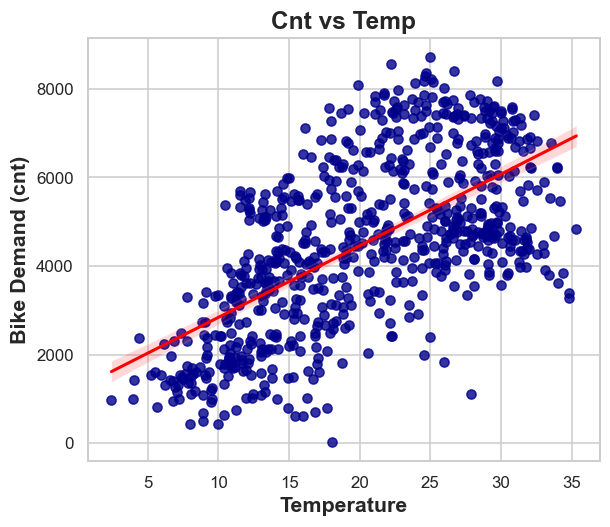

In [35]:
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Cnt vs Temp", fontsize=16, fontweight='bold')
sns.regplot(data=df_bike_data, y="cnt", x="temp", scatter_kws={'color':'darkblue'}, line_kws={'color':'red', 'linewidth':2})
plt.xlabel("Temperature", fontsize=14, fontweight='bold')
plt.ylabel("Bike Demand (cnt)", fontsize=14, fontweight='bold')
plt.show()

#### _`Inference`_:
- The bike demand (cnt) shows a positive relationship with temperature (temp).
- As temperature increases, we observe a steady rise in demand for bikes, indicating a strong linear trend.

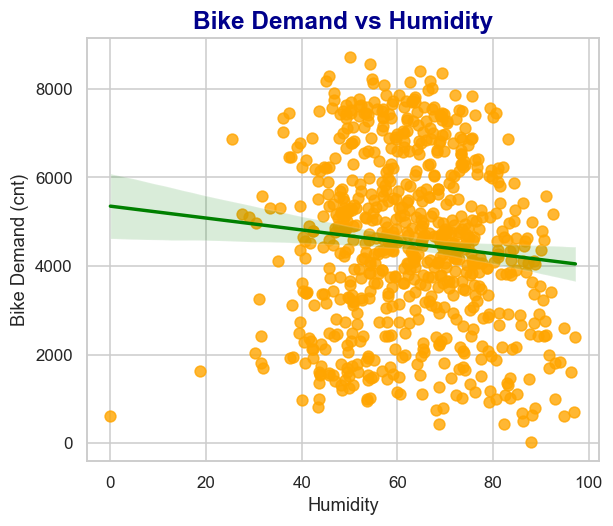

In [36]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Bike Demand vs Humidity", fontsize=16, fontweight='bold', color='darkblue')
sns.regplot(data=df_bike_data, y="cnt", x="hum", scatter_kws={'s': 50, 'color': 'orange'}, line_kws={'color': 'green'})
plt.xlabel("Humidity", fontsize=12)
plt.ylabel("Bike Demand (cnt)", fontsize=12)
plt.show()

#### _`Key Insights`_:
- The values of humidity (hum) show a higher degree of variability with some scattered patterns.
- Despite the scattered data, we observe a noticeable downward trend in bike demand (`cnt`) as humidity increases, indicating a negative relationship.

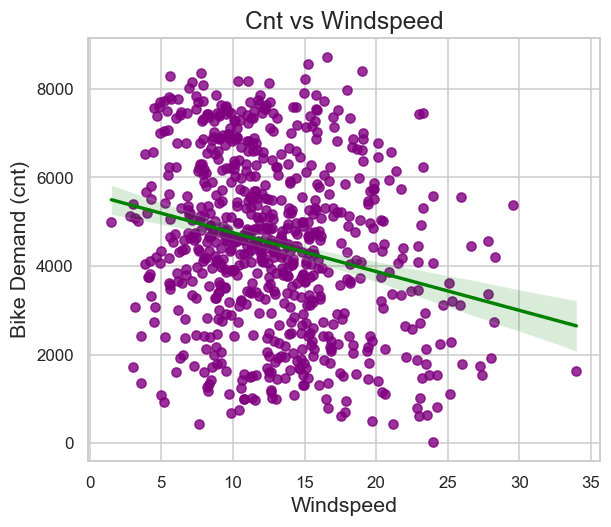

In [37]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Windspeed", fontsize=16)
sns.regplot(data=df_bike_data, y="cnt", x="windspeed", scatter_kws={'color':'purple'}, line_kws={'color':'green'})
plt.xlabel("Windspeed", fontsize=14)
plt.ylabel("Bike Demand (cnt)", fontsize=14)
plt.show()

#### _`Key Insights:`_
- The relationship between windspeed and bike demand (`cnt`) shows greater dispersion of values.
- We observe a negative trend where bike demand decreases as windspeed increases, though the data points are more scattered.

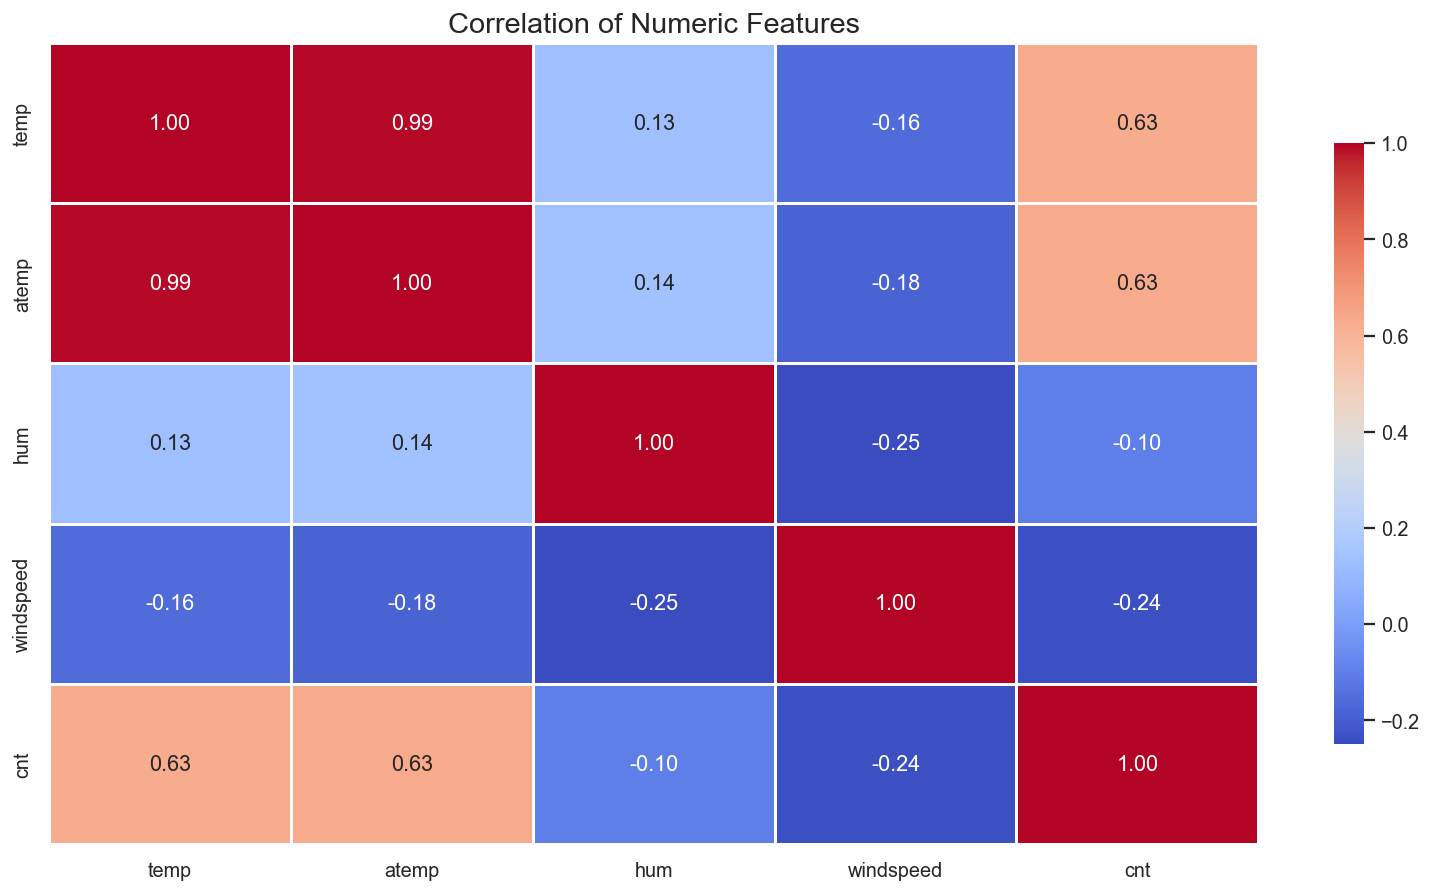

In [38]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(15,8), dpi=130)
plt.title("Correlation of Numeric Features", fontsize=16)
sns.heatmap(df_bike_data[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7, cbar_kws={'shrink': 0.75})
plt.show()

#### _`Inference`_:
- Temperature (`temp`) and "Feels Like" temperature (`atemp`) are highly correlated, which suggests that one of them could potentially be removed from the model. However, we will keep both for further analysis.
- Both `temp` and `atemp` also show strong correlations with the target variable, `cnt`, making them important features in the model.

In [39]:
df_bike_data.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old  
count  730.000000   730.000000  730.000000  
mean    12.763620  4508.006849  364.500000  
std      5.195841  1936.011647  210.877136  
min      1.500244    22.000000    0.000000  
25%      9.041650  3169.750000  182.250000  
50%     12.125325  4548.500000  364.500000  
75%     15.625589  5966.000000  546.750000  
max     34.000021  8714.000000  729.000000

### 5. Data Preparation for Linear Regression

1. **Selecting Relevant Features**: We will choose the features that are most likely to impact bike demand, including both numerical and categorical variables like temperature, humidity, season, and weather.

2. **One-hot Encoding of Categorical Variables**: Categorical variables such as season, month, weekday, and weather situation will be converted into binary columns using one-hot encoding to make them suitable for the linear regression model.

3. **Handling Multicollinearity (Variance Inflation Factor)**: We will check the Variance Inflation Factor (VIF) for each feature to identify any multicollinearity issues. Features with a VIF greater than 10 will be dropped. For instance, `atemp` might be removed due to its high correlation with `temp`.

4. **Splitting the Data**: The dataset will be split into training and testing sets (80% for training, 20% for testing) to evaluate the model's performance.

5. **Feature Scaling (Standardization)**: We will standardize the features to ensure that all variables contribute equally to the model, especially since we have variables with different scales (e.g., temperature vs. wind speed).

The data will be prepared and ready for building the linear regression model.

# Creating dummy variables for all categorical variables

In [40]:
# Creating dummy variables for categorical columns "season", "mnth", "weekday" and "weathersit"
df_bike_data = pd.get_dummies(data=df_bike_data, columns=["season", "mnth", "weekday"], drop_first=True)
df_bike_data = pd.get_dummies(data=df_bike_data, columns=["weathersit"])

# Checking the dataframe after adding dummy variables
df_bike_data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0              1  ...          0            0            1   
1         1              1  ...          0            0            0   
2         2              1  ...          0            1            0   
3         3              1  ...          0            0            0   
4         4              1  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

- Dropped the first column for categorical variables like `season`, `mnth`, and `weekday` to avoid multicollinearity, as (p-1) dummies are enough to explain p categories.
- In the case of `weathersit`, the first column was not dropped to preserve information about the "severe weather" category, ensuring no loss of significant details for the model.

In [41]:
# Print columns after creating dummies
df_bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [42]:
# Print few rows to inspect
df_bike_data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0              1  ...          0            0            1   
1         1              1  ...          0            0            0   
2         2              1  ...          0            1            0   
3         3              1  ...          0            0            0   
4         4              1  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

### 6. Model Building

#### 6.1 Split Data into Training and Test

In [43]:
# Checking shape before splitting
df_bike_data.shape

(730, 32)

In [44]:
# y to contain only target variable
y = df_bike_data.pop('cnt')

In [45]:
# X is all remaining variables (independent variables)
X = df_bike_data

In [46]:
# Train-Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Inspect independent variables
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            0            1   
1              1              0  ...          0            0            0   
2              1              0  ...          0            1            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

In [48]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### 6.2 Feature Scaling of Continuous Variables

To ensure all features are on the same scale for easier interpretation.

The following columns are continuous and will be scaled:
- `temp`
- `hum`
- `windspeed`

In [49]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Scaling continuous variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'days_old']

In [51]:
# Using MinMaxScaler for normalization
scaler = MinMaxScaler()

In [52]:
# Fit and transform the training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [53]:
# Inspect statistics of the training set after scaling
print(X_train.describe())
X_train.head()

               yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.669276    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.470935    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed    days_old  season_spring  season_summer  ...  mnth_sept  \
count  511.000000  511.000000     511.000000     511.000000  ...  511.00000   
mean     0.414873    0.512409       0.230920       0.258317  ...    0.09002   
std      0.185619    0.292268    

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     days_old  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
683  0.936900              0              0  ...          0            0   
645  0.884774              0              0  ...          0            1   
163  0.223594              0              1  ...          0            1   
360  0.493827              1              0  ...          0            0   
640  0.877915              0              0  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
683            0            0            1            0            0   
645            0            0            0            0            0   
163            0            0            0            0            0   
360            0            0            0            1            0   
640            0            0            0            0            1   

     weathersit_bad  weathersit_good  weathersit_moderate  
683               0                0                    1  
645               0                0                    1  
163               0                1                    0  
360               0                0                    1  
640               0                0                    1  

[5 rows x 31 columns]

## 6.3 Building a Model using RFE and Automated Approach

#### Utilizing RFE (Recursive Feature Elimination) to eliminate less significant columns.

In [54]:
# Building a Linear Regression model using SKLearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# Instantiate the Linear Regression model
lr = LinearRegression()

In [56]:
# Perform Recursive Feature Elimination (RFE) to select 15 features
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [57]:
# Extract RFE support and ranking
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_

In [58]:
# Display the selected features
selected_features = X_train.columns[rfe_support]
print("Selected Features:", selected_features)

Selected Features: Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')


In [59]:
# Columns selected by RFE along with their support and ranking
feature_selection_details = list(zip(X_train.columns, rfe_support, rfe_ranking))
print("Feature Selection Details:", feature_selection_details)

Feature Selection Details: [('yr', True, 1), ('holiday', True, 1), ('workingday', False, 3), ('temp', True, 1), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('days_old', True, 1), ('season_spring', True, 1), ('season_summer', False, 15), ('season_winter', True, 1), ('mnth_aug', False, 7), ('mnth_dec', False, 5), ('mnth_feb', False, 10), ('mnth_jan', False, 9), ('mnth_jul', False, 14), ('mnth_jun', False, 8), ('mnth_mar', True, 1), ('mnth_may', True, 1), ('mnth_nov', False, 6), ('mnth_oct', True, 1), ('mnth_sept', True, 1), ('weekday_mon', False, 13), ('weekday_sat', False, 2), ('weekday_sun', False, 12), ('weekday_thu', False, 17), ('weekday_tue', False, 11), ('weekday_wed', False, 16), ('weathersit_bad', True, 1), ('weathersit_good', True, 1), ('weathersit_moderate', False, 4)]


## 6.4 Manual Elimination

##### Defining a function to build a model using the Statsmodels API

In [60]:
# Function to build a model using the Statsmodels API
# Takes the columns to be selected for the model as a parameter
def build_ols_model(cols):
    # Add a constant to the predictors
    X_train_sm = sm.add_constant(X_train[cols])
    
    # Fit the model using Ordinary Least Squares (OLS)
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Display the model summary
    print(lm.summary())
    
    return lm

##### Function to calculate Variance Inflation Factors (VIFs) and print them

In [61]:
# Function to calculate Variance Inflation Factors (VIFs) and print them
# Takes the columns for which VIF needs to be calculated as a parameter
def calculate_vif(cols):
    # Select the columns from X_train
    df1 = X_train[cols]
    
    # Create a DataFrame to store VIF results
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    
    # Calculate VIF for each feature
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    
    # Round VIF values to 2 decimal places
    vif['VIF'] = round(vif['VIF'], 2)
    
    # Print the sorted VIF values
    print(vif.sort_values(by='VIF', ascending=False))

In [62]:
# Displaying the columns selected by RFE
print("Columns selected by RFE:")
print(X_train.columns[rfe.support_])

Columns selected by RFE:
Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')


In [63]:
# Displaying the features not selected by RFE
print("Features not selected by RFE:")
print(X_train.columns[~rfe.support_])

Features not selected by RFE:
Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')


In [64]:
# Selecting the 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
                       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
                       'weathersit_bad', 'weathersit_moderate']]

In [65]:
# Checking the shape of the selected features
print("Shape of the selected data:")
X_train_rfe.shape

Shape of the selected data:


(511, 15)

# 6. Build Model 

### 6.1 Model Development Process
## Model 1: All Columns Selected by RFE

### Selected Features:
The following columns, selected by Recursive Feature Elimination (RFE), are used in this model:

- **yr**: Year (0 for 2018, 1 for 2019)
- **holiday**: Holiday indicator (1 for holiday, 0 for non-holiday)
- **workingday**: Working day indicator (1 for working day, 0 for weekend/holiday)
- **temp**: Temperature (Celsius)
- **hum**: Humidity
- **windspeed**: Wind speed
- **season_spring**, **season_summer**, **season_winter**: Seasonal indicators
- **mnth_jan**, **mnth_jul**, **mnth_sept**: Monthly indicators
- **weekday_sat**: Saturday indicator
- **weathersit_bad**, **weathersit_moderate**: Weather conditions

### Model Overview:
This model predicts bike rental demand (`cnt`) using the selected features. Now, we will build and evaluate the model.

In [66]:
# Selected columns for Model 1 - All columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']

In [67]:
# Building the model with selected columns
build_ols_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.52e-183
Time:                        01:38:00   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

In [68]:
# Calculating and printing VIF for the selected columns
calculate_vif(cols)

               Features    VIF
4                   hum  27.40
3                  temp  17.86
5             windspeed   5.70
2            workingday   5.16
6         season_spring   4.36
8         season_winter   3.22
7         season_summer   2.98
14  weathersit_moderate   2.22
0                    yr   2.10
12          weekday_sat   1.91
10             mnth_jul   1.83
9              mnth_jan   1.68
11            mnth_sept   1.47
13       weathersit_bad   1.27
1               holiday   1.18


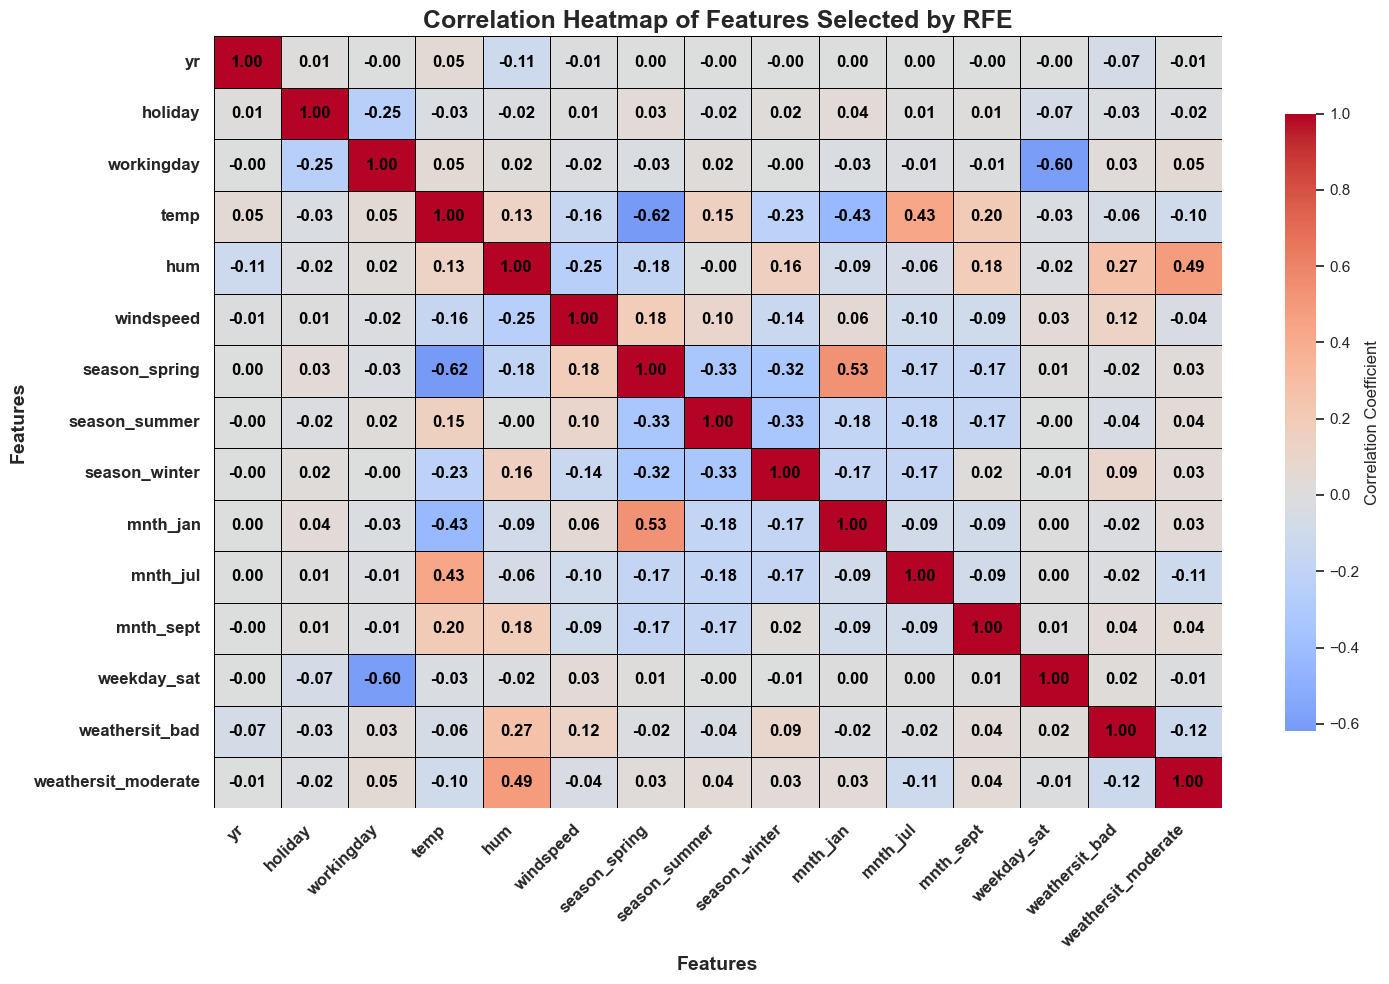

In [69]:
# Checking correlation of features selected by RFE with the target column
# Also analyzing the impact of different features on the target variable

# Set up the figure and size for the heatmap
plt.figure(figsize=(15, 10))

# Create the correlation matrix
corr_matrix = df_bike_data[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
                                    'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
                                    'weathersit_bad', 'weathersit_moderate']].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', 
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}, fmt='.2f', 
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'})  # Bigger and bolder annotations

# Add title and adjust layout
plt.title('Correlation Heatmap of Features Selected by RFE', fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Features', fontsize=14, weight='bold')

# To make sure that labels and ticks are clear and readable
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')  # Rotate x-axis labels for clarity
plt.yticks(rotation=0, fontsize=12, weight='bold')  # Keep y-axis labels horizontal for readability

# Adjusting layout to prevent label clipping
plt.tight_layout()
plt.show()

### Model 2: Removing Insignificant Variables
#### Dropped `mnth_jan` due to its negative coefficient and high p-value.

In [70]:
## Model 2: Removing Insignificant Variables
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.59e-184
Time:                        01:38:02   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

### Model 3: Dropping `hum` Due to High P-Value
#### `hum` has a negative coefficient and a high p-value.

In [71]:
## Model 3: Dropping `hum` Due to High P-Value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.46e-181
Time:                        01:38:02   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

### Model 4: Dropping `holiday` Due to High P-Value
#### `holiday` has a negative coefficient and is insignificant.

In [72]:
## Model 4: Dropping `holiday` Due to High P-Value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.56e-182
Time:                        01:38:02   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

### Model 5: Dropping `mnth_jul` Due to High P-Value
#### `mnth_jul` has a negative coefficient and high p-value.

In [73]:
## Model 5: Dropping `mnth_jul` Due to High P-Value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.57e-182
Time:                        01:38:02   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

### Model 6: Dropping `temp` Due to High P-Value
#### `temp` has a negative coefficient and is insignificant.

In [74]:
## Model 6: Dropping `temp` Due to High P-Value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.84e-150
Time:                        01:38:02   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

### Model 7: Replacing `mnth_jul` with `season_spring` (Highly Correlated Features)
#### Attempting to use `season_spring` instead of `mnth_jul`.

In [75]:
## Model 7: Replacing `mnth_jul` with `season_spring`
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.93e-97
Time:                        01:38:02   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

### Model 8: Same as Model 7 for Verification
#### Another trial replacing `mnth_jul` with `season_spring`.

In [76]:
## Model 8: Same as Model 7 for Verification
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.93e-97
Time:                        01:38:02   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

### Model 9: Dropping `windspeed` Due to High Correlation with `temp`
#### `windspeed` is highly correlated with `temp`, so removing it.

In [77]:
## Model 9: Dropping `windspeed` Due to High Correlation with `temp`
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.90e-146
Time:                        01:38:02   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

### Model 10: Replacing `weekday_sat` with `weekday_sun`
#### Using `weekday_sun` instead of Saturday for better accuracy.

In [78]:
## Model 10: Replacing `weekday_sat` with `weekday_sun`
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
        'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_bad', 'weathersit_moderate']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.32e-145
Time:                        01:38:02   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

### Model 11: Adding `temp` and Removing `season_summer` and `workingday`
#### Added `temp`, removed `season_summer` and `workingday` to improve model.

In [79]:
## Model 11: Adding `temp` and Removing `season_summer` and `workingday`
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_bad', 'weathersit_moderate', 'temp']
build_ols_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.33e-179
Time:                        01:38:03   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

#### _Inference_

Model 11 is selected as the final model for the following reasons:
- The **VIF** values are within acceptable limits, and all feature **p-values** are close to 0.0.
- The **R-squared** value is 0.821, indicating a good fit.
- It shows **high R-squared**, **Adjusted R-squared**, and **F-statistic** values, indicating strong explanatory power.
- There are **no insignificant features**, and no issues with **multicollinearity** (low VIF values).

The small difference between **R-squared** and **Adjusted R-squared** indicates that the model is well-optimized, and no further variables can be removed. Therefore, Model 11 is the best choice for prediction.

In [80]:
# Build a model with all columns to select features automatically
def build_ols_model_sk(X, y):
    lr1 = LinearRegression()
    lr1.fit(X, y)
    return lr1

In [81]:
# Columns selected for the final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

In [82]:
# Build the model with the selected columns
lr = build_ols_model_sk(X_train[cols], y_train)

In [83]:
# Print the intercept and coefficients of the model
print(lr.intercept_, lr.coef_)

1849.311114143623 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


## Step 7. Model Evaluation
### 7.1 Residual Analysis

Residual analysis helps assess the model's fit by checking the differences between observed and predicted values.

In [84]:
# Predicting on the training set
y_train_pred = lr.predict(X_train[cols])

In [85]:
# Function to plot histogram of error terms
def visualize_residuals(actual, predicted):
    sns.histplot(actual - predicted, kde=True, color='purple', bins=25)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.show()

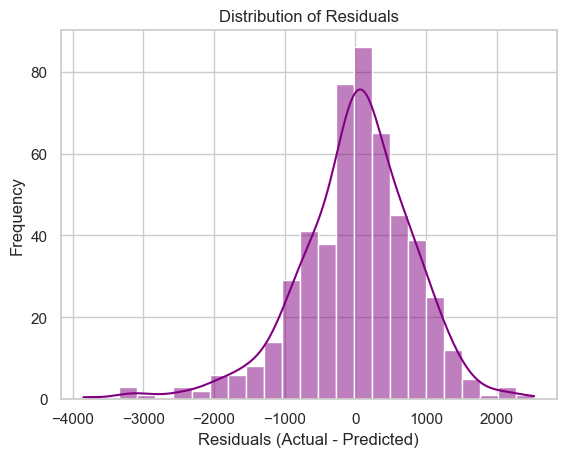

In [86]:
# Plotting the residual distribution
visualize_residuals(y_train, y_train_pred)

# Observing the distribution of residuals
### The errors seem to be normally distributed with a mean of 0, indicating that the model is a good fit.

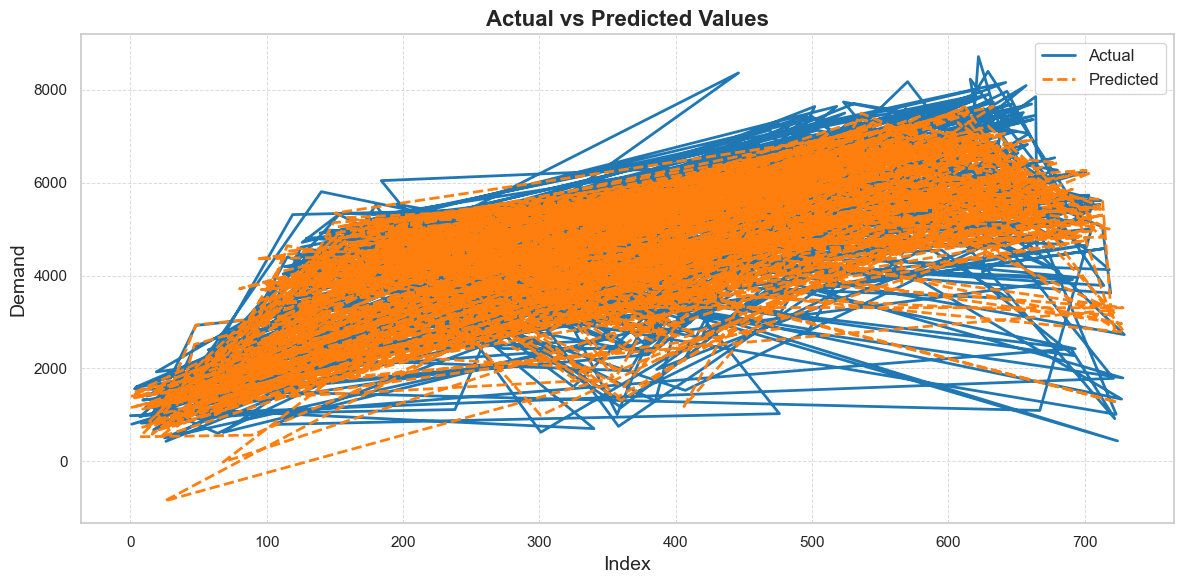

In [87]:
# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='#1f77b4', label='Actual', linewidth=2)
plt.plot(y_train.index, y_train_pred, color='#ff7f0e', linestyle='--', label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

### The Actual and Predicted values follow similar trends, indicating a good model performance.

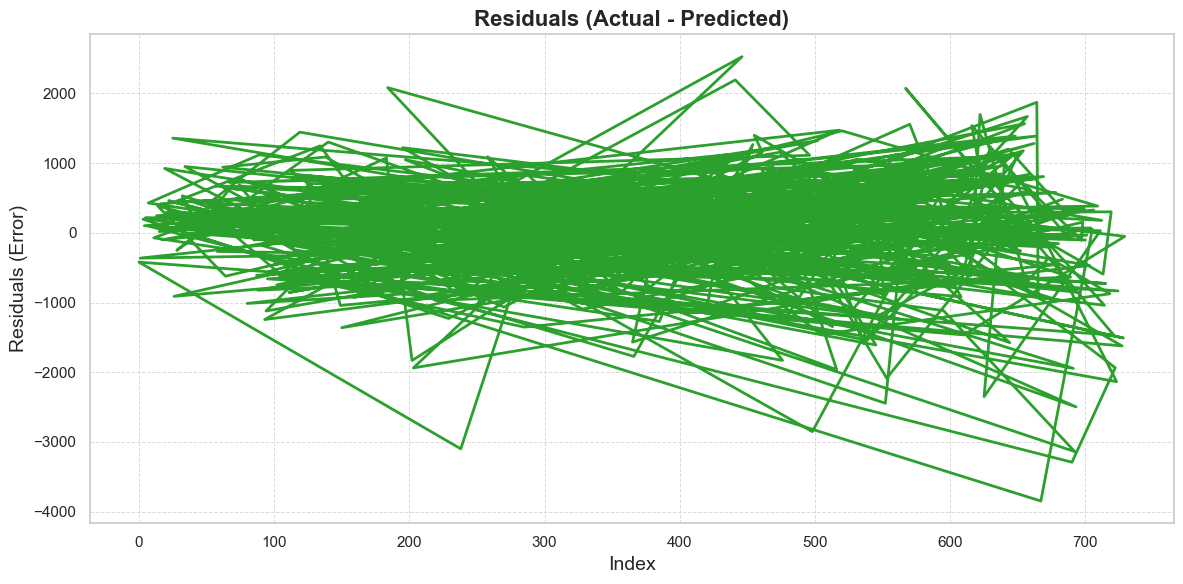

In [88]:
# Error Terms Plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train - y_train_pred, color='#2ca02c', linewidth=2)
plt.title('Residuals (Actual - Predicted)', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Residuals (Error)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

#### Residuals Analysis
The error terms appear to be independent of each other, as there is no visible pattern in the residuals plot. This suggests that the model is well-calibrated, and the assumptions of linear regression (such as homoscedasticity and independence of errors) hold true.

In [89]:
# Print R-squared Value
r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared for the training set: {r2_train:.4f}')

R-squared for the training set: 0.8185


### _`Inference`_
The R-squared value obtained is consistent with that of the final model, indicating a good fit for the data.

### 7.2 Linearity Check

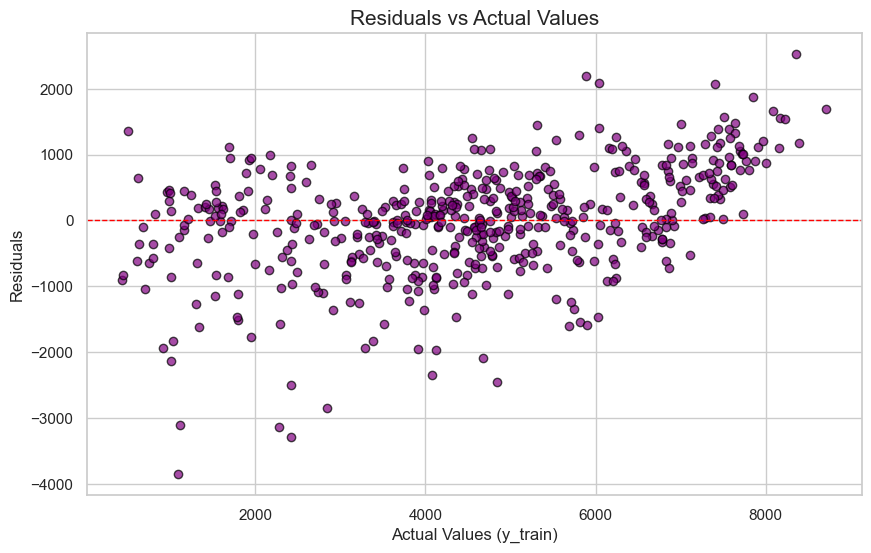

In [90]:
# Scatter plot for linearity check
residual = y_train - y_train_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train, residual, color='purple', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Actual Values', fontsize=15)
plt.xlabel('Actual Values (y_train)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

### 7.3 Predict values for test data set

In [91]:
# Scale numerical variables in X_test
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'days_old']

In [92]:
# Transform the test data using the fitted scaler (no fitting on test data)
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [93]:
# Selected columns from the final model
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 
        'mnth_sept', 'weekday_sun', 'weathersit_bad', 
        'weathersit_moderate', 'temp']

In [94]:
# Predict the target variable on the test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared Value for Test Predictions

In [95]:
# Calculate the R-squared value for train data and predicted train data
train_r2 = round(r2_score(y_train, y_train_pred), 3)

In [96]:
# Calculate the R-squared value for test data and predicted test data
test_r2 = round(r2_score(y_test, y_test_pred), 3)

In [97]:
train_r2, test_r2

(0.819, 0.816)

The R-squared value for predictions on **train data** and **test data** are calculated as follows:

- **Train R-squared**: 0.819
- **Test R-squared**: 0.816

This slight difference in values is due to the model’s performance on different data subsets (training set and the unseen test data).

### 7.5 Homoscedasticity

##### _`Inference`_
The R-squared value for predictions on **test data (0.816)** is nearly identical to the R-squared value for **train data (0.819)**. This indicates strong model performance and suggests that the model generalizes well to unseen test data.

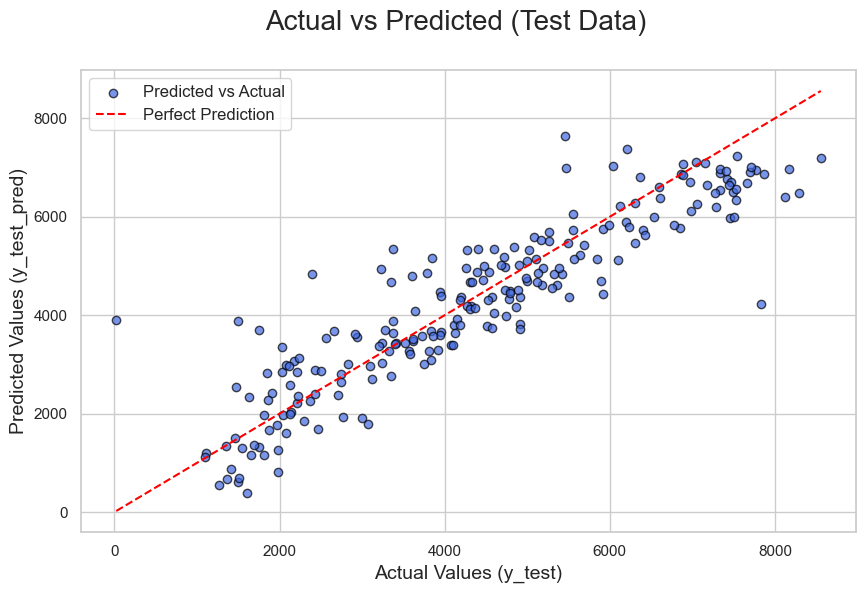

In [98]:
# Plotting Actual vs Predicted (Test Data)

fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='royalblue', edgecolor='black', alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
fig.suptitle('Actual vs Predicted (Test Data)', fontsize=20)
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (y_test_pred)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

#### _`Inference`_  
We can observe that the variance of the residuals (error terms) remains constant across predictions. This means that the error term does not significantly vary as the predictor variable changes.

### 7.6 Plot: Actual vs Predicted (Test Data)

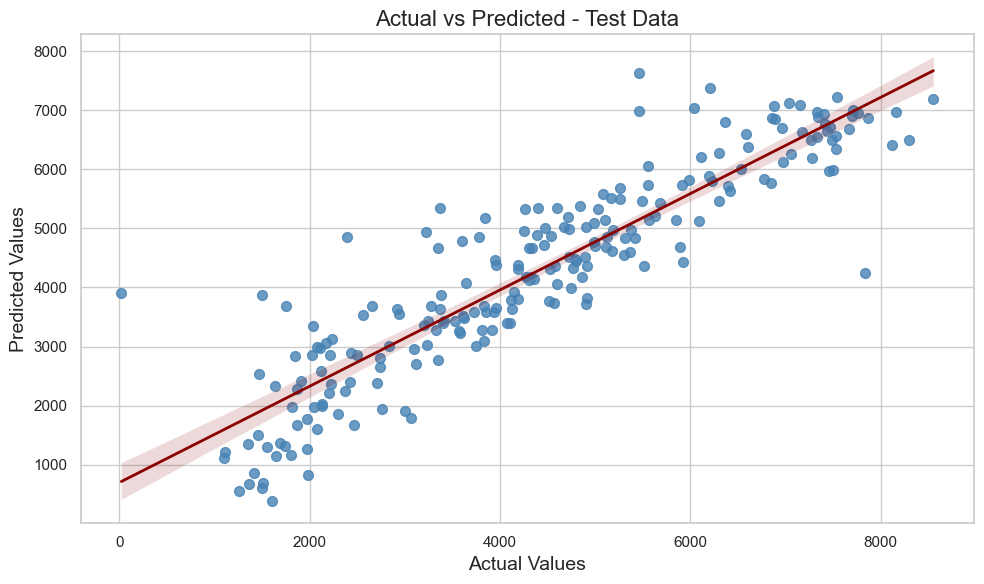

In [99]:
# Function to plot Actual vs Predicted using Scatter Plot with Regression Line
def plot_actual_pred_trendline(act, pred, dataname):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of Actual vs Predicted with Seaborn style
    sns.regplot(x=act, y=pred, scatter_kws={'color':'steelblue', 's':50}, line_kws={'color':'darkred', 'linewidth':2})
    
    plt.title(f'Actual vs Predicted - {dataname}', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot Actual vs Predicted for Test Data
plot_actual_pred_trendline(y_test, y_test_pred, 'Test Data')

### 7.7 Plot Error Terms for Test Data

#### _`Inference`_
The scatter plot of error terms (Actual - Predicted) for the test data displays the distribution of errors across the entire dataset. The red dashed line at 0 represents the ideal situation where the predictions match the actual values. 

We can assess whether there are any systematic patterns or trends in the error terms. If the errors are randomly distributed around zero, it indicates that the model is performing well, and there is no significant bias in the predictions. The plot gives an intuitive visualization of how well the model's predictions align with the actual values.

In [100]:
# Function to plot Error Terms
def visualize_error_terms(actual, predicted):
    indices = [i for i in range(1, len(actual)+1)]
    plt.figure(figsize=(14, 6))
    plt.plot(indices, actual - predicted, color="darkorange", marker='x', linestyle='-', markersize=8)
    plt.title('Residuals (Error Terms) - Test Data', fontsize=20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Error (Actual - Predicted)', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

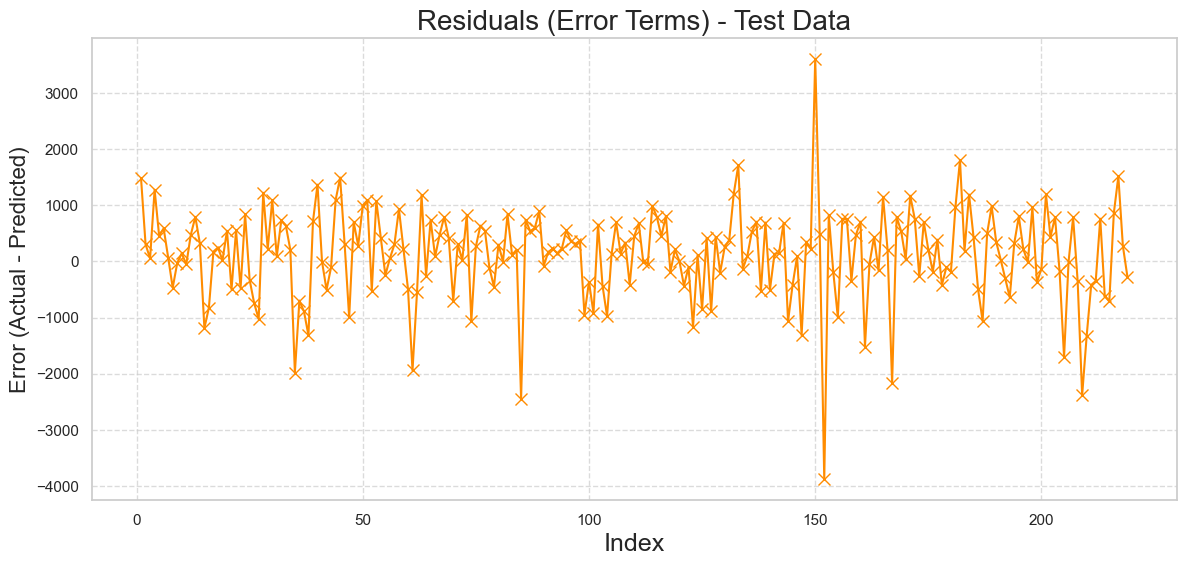

In [101]:
# Plot error terms for test data
visualize_error_terms(y_test, y_test_pred)

#### _`Inference`_
The error terms appear to be randomly distributed with no discernible pattern. This indicates that the model has effectively explained the output, and there are no additional variables that could improve the model's performance further.

### 8. Making Predictions

In [102]:
# Displaying the first few rows of the data before scaling
df_bike_data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            0            1   
1              1              0  ...          0            0            0   
2              1              0  ...          0            1            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

### 8.1 Interpreting the Model

#### Let's interpret the RFE results along with the manual model results, as we prioritize imputation.

In [103]:
# Rebuilding the final model combining manual selection and RFE approach using statsmodels for interpretation
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_ols_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.33e-179
Time:                        01:38:05   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Interpretation of Results

After analyzing the model's results, the company should focus on the following key features for strategic decisions:

- **Seasonal Demand**: There is a clear trend indicating that **Spring** sees the highest demand for bike-sharing services. The company should focus on marketing campaigns and special offers during this season to capitalize on the demand surge.
  
- **September Boost**: The month of **September** also shows strong business potential, likely due to favorable weather conditions. The company should plan targeted promotions during this period to optimize business performance.

- **Post-COVID Recovery**: Based on historical data, once the situation normalizes, the number of users is expected to increase significantly compared to **2019**. The company should prepare for a potential surge in demand as people return to normalcy.

- **Weather Considerations**: **Light Snow** or **Rainy** conditions generally result in fewer bookings. During these times, the company could focus on **bike maintenance and servicing** rather than expecting high business impact.

#### Strategic Recommendations

When the situation returns to normal, the company should consider the following strategies:
- Launch **promotional offers** in **Spring** to attract more customers when the weather is ideal for bike rides.
- Invest in **targeted advertising** for **September**, as this is the month when demand is likely to peak.
- **Leverage quieter weather periods**, such as during snow or rain, to optimize **bike maintenance** and infrastructure improvements without significant loss in revenue.

---

### Conclusion

The following significant variables were identified as crucial predictors for demand forecasting in the bike-sharing business:
- **Holiday** (indicating demand fluctuations during festive periods)
- **Temperature** (affecting user comfort and demand)
- **Humidity** (influencing user experience and demand)
- **Windspeed** (a factor affecting user comfort)
- **Season** (Spring and Winter show key variations)
- **Months**: **January, July, September, November, December** show distinct trends in demand.
- **Year (2019)**: Indicates a baseline for comparison with post-pandemic demand.
- **Sunday**: A day with higher demand due to weekend activity.
- **Weather Situation**: **Light Snow** and **Mist + Cloudy** weather show a negative correlation with bike-sharing demand.

By strategically focusing on these variables, the company can align its operations, marketing efforts, and service offerings to match the expected demand patterns, ultimately boosting business performance and customer satisfaction.

### `End of Assignment`

**-----------------------------------------------------------------------------------------------------   x   x   x   -----------------------------------------------------------------------------------------------------**
